In [ ]:
!pip install contractions

In [19]:
#import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import joblib
import importlib
import pipeline
importlib.reload(pipeline) 
from pipeline import load_kaggle, clean_dataset, train_logreg, train_svm, eval_on_dataset

## Read Data

In [20]:
# Load dataset using pipeline function
df = load_kaggle()
print(f"Dataset shape: {df.shape}")

Dataset shape: (44898, 5)


/var/folders/jd/mgw4_1597kg826dq7kxw81mw0000gn/T/ipykernel_13773/4190091810.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["False", "True"])


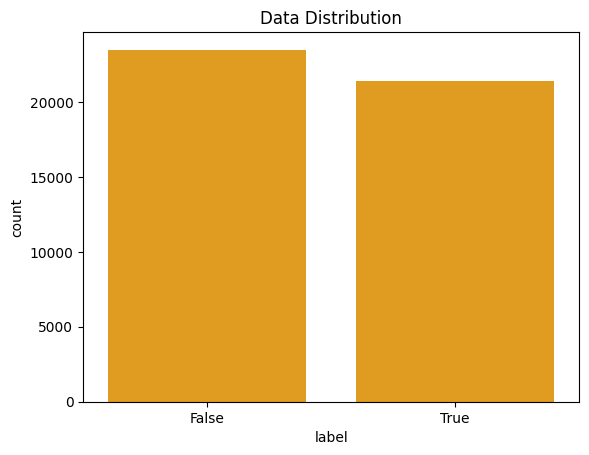

In [21]:
ax = sns.countplot(data=df, x="label", color="orange")
ax.set_xticklabels(["False", "True"])
plt.title("Data Distribution")
plt.show()

## Data Exploration

In [22]:
fake_df = pd.read_csv("datasets/kaggle/kaggle_fake.csv")
fake_df.head()


,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [23]:
true_df = pd.read_csv("datasets/kaggle/kaggle_real.csv")
true_df.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [24]:
df.describe()

,label
count,44898.000000
mean,0.477015
std,0.499477
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


## Data Preprocessing

In [25]:
df = clean_dataset(df)

df.head()

,title,text,subject,date,label
0,conservative convicted of trying to assassinat...,a wisconsin man who believed it to be his cons...,News,"January 21, 2016",0
1,after torturous years of a wussified president...,just call him bring it ben ben carson says he ...,politics,"Oct 6, 2015",0
2,senator warren hits out at effort to politiciz...,washington reuters democratic senator elizabet...,politicsNews,"December 18, 2017",1
3,turkeys erdogan iraqi kurds decision not to po...,ankara reuters iraqi kurdish leader massoud ba...,worldnews,"September 15, 2017",1
4,saudiled coalition says strike hit a legitimat...,cairo reuters a saudiled military coalition sa...,worldnews,"November 4, 2017",1


In [26]:
df.shape

(38646, 5)

## Baseline Logistic Regression Model

In [21]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    df["text"], df["label"], test_size=0.01, random_state=42
)

In [22]:
# Train model using pipeline function
model, vectorizer = train_logreg(X_train, y_train)

# Evaluate model using pipeline function
accuracy, report = eval_on_dataset(model, vectorizer, X_test, y_test)

print("=== LR Results ===")
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, model.predict(vectorizer.transform(X_test))))

# Save models to joblist/ folder (as per README)
joblib.dump(model, "joblist/logreg_model.pkl")
joblib.dump(vectorizer, "joblist/logreg_vectorizer_kaggle.pkl")
print("\nModels saved to joblist/ folder")

=== LR Results ===
Accuracy: 0.9896640826873385

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       168
           1       0.99      1.00      0.99       219

    accuracy                           0.99       387
   macro avg       0.99      0.99      0.99       387
weighted avg       0.99      0.99      0.99       387


Models saved to joblist/ folder


## Support Vector Machine (SVM) Model

In [23]:
# Train SVM model using pipeline function
svm_model, svm_vectorizer = train_svm(X_train, y_train)

# Evaluate SVM model using pipeline function
svm_accuracy, svm_report = eval_on_dataset(svm_model, svm_vectorizer, X_test, y_test)

print("=== SVM Results ===")
print("Accuracy:", svm_accuracy)
print("\nClassification Report:")
print(classification_report(y_test, svm_model.predict(svm_vectorizer.transform(X_test))))

# Save models to joblist/ folder (as per README)
joblib.dump(svm_model, "joblist/svm_model.pkl")
joblib.dump(svm_vectorizer, "joblist/svm_vectorizer_kaggle.pkl")
print("\nSVM models saved to joblist/ folder")


=== SVM Results ===
Accuracy: 0.9948320413436692

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       168
           1       0.99      1.00      1.00       219

    accuracy                           0.99       387
   macro avg       1.00      0.99      0.99       387
weighted avg       0.99      0.99      0.99       387


SVM models saved to joblist/ folder


In [ ]:
# Train NB model using pipeline function
nb_model, nb_vectorizer = train_nb(X_train, y_train)

# Evaluate NB model using pipeline function
nb_accuracy, nb_report = eval_on_dataset(nb_model, nb_vectorizer, X_test, y_test)

print("=== Naive Bayes Results ===")
print("Accuracy:", nb_accuracy)
print("\nClassification Report:")
print(classification_report(y_test, nb_model.predict(nb_vectorizer.transform(X_test))))

# Save models to joblist/ folder (as per README)
joblib.dump(nb_model, "joblist/nb_model.pkl")
joblib.dump(nb_vectorizer, "joblist/nb_vectorizer_kaggle.pkl")
print("\nNB models saved to joblist/ folder")

In [24]:
# Compare models
print("=== Model Comparison ===")
print(f"Logistic Regression Accuracy: {accuracy:.4f}")
print(f"SVM Accuracy: {svm_accuracy:.4f}")
print(f"\nSVM improvement from LR: {svm_accuracy - accuracy:.4f} ({((svm_accuracy - accuracy) / accuracy * 100):.2f}%)")
print(f"Naive Bayes Accuracy: {nb_accuracy:.4f}")
print(f"\nNB improvement from LR: {nb_accuracy - accuracy:.4f} ({((nb_accuracy - accuracy) / accuracy * 100):.2f}%)")



=== Model Comparison ===
Logistic Regression Accuracy: 0.9897
SVM Accuracy: 0.9948

SVM improvement: 0.0052 (0.52%)
